In [1]:
library(caret)
library(ggplot2)
library(dplyr)

Loading required package: ggplot2

Loading required package: lattice


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
library(readr)
library(corrplot)
library(mlbench)
library(Amelia)
library(plotly)
library(reshape2)
library(caTools)
library(randomForest)
library(knitr)

corrplot 0.92 loaded

Loading required package: Rcpp

## 
## Amelia II: Multiple Imputation
## (Version 1.8.1, built: 2022-11-18)
## Copyright (C) 2005-2022 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 


Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




In [3]:
#install.packages("corrplot")

In [4]:
#install.packages("readr")

In [5]:
#install.packages("mlbench")

In [6]:
#install.packages("Amelia")

In [7]:
#install.packages("plotly")

In [8]:
#install.packages("reshape2")

In [9]:
#install.packages("caTools")

In [10]:
#install.packages("randomForest")
#install.packages("knitr")

In [11]:
train_data <- read.csv("train.csv")

In [12]:
test_data <- read.csv("test.csv")

In [13]:
dim(train_data)

[1] 1460   81

In [14]:
dim(test_data)

[1] 1459   80

In [15]:
train_data$GrLivArea

[1] 1710 1262 1786 1717 2198 1362 1694 2090 1774 1077 1040 2324  912 1494
  [15] 1253  854 1004 1296 1114 1339 2376 1108 1795 1060 1060 1600  900 1704
  [29] 1600  520 1317 1228 1234 1700 1561 2452 1097 1297 1057 1152 1324 1328
  [43]  884  938 1150 1752 2149 1656 1452  955 1470 1176  816 1842 1360 1425
  [57] 1739 1720 2945  780 1158 1111 1370 1710 2034 2473 2207 1479  747 2287
  [71] 2223  845 1718 1086 1605  988  952 1285 1768 1230 2142 1337 1563 1065
  [85] 1474 2417 1560 1224 1526  990 1040 1235  964 2291 1786 1470 1588  960
  [99]  835 1225 1610 1732 1535 1226 1818 1992 1047  789 1517 1844 1855 1430
 [113] 2696 2259 2320 1458 1092 1125 3222 1456  988 1123 1080 1199 1586  754
 [127]  958  840 1348 1053 2157 2054 1327 1296 1721 1682 1214 1959 1852 1764
 [141]  864 1734 1385 1501 1728 1709  875 2035 1080 1344  969 1710 1993 1252
 [155] 1200 1096 1040 1968 1947 2462 1232 2668 1541  882 1616 1355 1867 2161
 [169] 1720 1707 1382 1656 1767 1362 1651 2158 2060 1920 2234  968 1525 1802
 [183] 1340 2082 1252 3608 1217 1656 1224 1593 2727 1479 1431 1709  864 1456
 [197] 1726 3112 2229 1713 1121 1279 1310  848 1284 1442 1696 1100 2062 1092
 [211]  864 1212 1852  990 1392 1236 1436 1328 1954 1248 1498 2267 1552  864
 [225] 2392 1302 2520  987  912 1555 1194 2794  987  894 1960  987 1414 1744
 [239] 1694 1487 1566  866 1440 1217 2110 1872 1928 1375 1668 2144 1306 1625
 [253] 1640 1302 1314 2291 1728 1604 1792  882 1382 2574 1212 1316  764 1422
 [267] 1511 2192  778 1113 1939 1363 2270 1632  816 1548 1560  864 2121 2022
 [281] 1982 1262 1314 1468 1575 1250 1734  858  900 1396 1919 1716 1716 2263
 [295] 1644 1003 1558 1950 1743 1152 1336 2452 1541  894 3493 2000 2243 1406
 [309]  861 1944 1501  972 1118 2036 1641 1432 2353 1959 2646 1472 2596 2468
 [323] 2730 1163 2978  803 1719 1383 2134 1192 1728 1056 1629 1358 1638 1786
 [337] 1922 1536 1621 1215 1908  841 1040 1684 1112 1577  958 1478 1626 2728
 [351] 1869 1453 1111  720 1595 1200 1167 1142 1352 1924  912 1505 1922  987
 [365] 1574 1344 1394 1431 1268 1287 1664 1588  752 1319 1928  904  914 2466
 [379] 1856 1800 1691 1301 1797  784 1953 1269 1184 1125 1479 2332 1367 1961
 [393]  882  788 1034 1144  894 1812 1077 1550 1288 1310  672 2263 1572 1620
 [407] 1639 1680 2172 2078 1276 1056 1478 1028 2097 1340 1400 2624 1134 1056
 [421] 1344 1602  988 2630 1196 1389 1644  907 1208 1412  987 1198 1365 1604
 [435]  630 1661 1118  904  694 1196 2402 1440 1573 1258 1908 1689 1888 1886
 [449] 1376 1183  813 1533 1756 1590 1728 1242 1344 1663 1666 1203 1935 1135
 [463]  864 1660 1040 1414 1277 1644 1634 1710 1502 1969 1072 1976 1652  970
 [477] 1493 2643 1718 1131 1850 1792 1826 1216  999 1113 1073 1484 2414  630
 [491] 1304 1578 1456 1269  886  720 3228 1820  899  912 1218 1768 1214 1801
 [505] 1322 1960 1911 1218 1378 1041 1363 1368  864 1080  789 2020 2119 2344
 [519] 1796 2080 1294 1244 1664 4676 2398 1266  928 2713  605 2515 1509 1362
 [533]  827  334 1414 1347 1724  864 1159 1601 1838 2285 1680  767 1496 2183
 [547] 1635  768  825 2094 1069  928 1717 1126 2046 1048 1092 1336 1446 1557
 [561] 1392 1389  996 1674 2295 1647 2504 1535 2132  943 1728  864 1692 1430
 [575] 1109 1216 1477 1320 1392 1795 1429 2042  816 2775 1573 2028  838  860
 [589] 1473  935 1582 2296  816  848  924 1826 1368 1402 1647 1556 1904 1375
 [603] 1915 1200 1494 1986 1040 2008 3194 1029 2153 1032 1872 1120  630 1054
 [617] 1509  832 1828 2262  864 2614  980 1512 1790 1116 1422 1520 2080 1350
 [631] 1750 1554 1411 1056 1056 3395  800 1387  796 1567 1518 1929 2704 1620
 [645] 1766  981 1048 1094 1839  630 1665 1510 1716 1469 2113 1092 1053 1502
 [659] 1458 1486 1935 2448 1392 1181 2097 1936 2380 1679 1437 1180 1476 1369
 [673] 1208 1839 1136 1441 1774  792 2046  988  923 1520 1291 1668 1839 2090
 [687] 1761 1102 1419 1362  848 4316 2519 1073 1539 1137  616 1148  894 1391
 [701] 1800 1164 2576 1812 1484 1092 1824 1324 1456  904  729 1178 1228  960
 [715] 1479 1350 2554 1178 2418  971 1742  848  864 1470 1698  864 1680 1232

In [16]:
str(train_data)

'data.frame':	1460 obs. of  81 variables:
 $ Id           : int  1 2 3 4 5 6 7 8 9 10 ...
 $ MSSubClass   : int  60 20 60 70 60 50 20 60 50 190 ...
 $ MSZoning     : chr  "RL" "RL" "RL" "RL" ...
 $ LotFrontage  : int  65 80 68 60 84 85 75 NA 51 50 ...
 $ LotArea      : int  8450 9600 11250 9550 14260 14115 10084 10382 6120 7420 ...
 $ Street       : chr  "Pave" "Pave" "Pave" "Pave" ...
 $ Alley        : chr  NA NA NA NA ...
 $ LotShape     : chr  "Reg" "Reg" "IR1" "IR1" ...
 $ LandContour  : chr  "Lvl" "Lvl" "Lvl" "Lvl" ...
 $ Utilities    : chr  "AllPub" "AllPub" "AllPub" "AllPub" ...
 $ LotConfig    : chr  "Inside" "FR2" "Inside" "Corner" ...
 $ LandSlope    : chr  "Gtl" "Gtl" "Gtl" "Gtl" ...
 $ Neighborhood : chr  "CollgCr" "Veenker" "CollgCr" "Crawfor" ...
 $ Condition1   : chr  "Norm" "Feedr" "Norm" "Norm" ...
 $ Condition2   : chr  "Norm" "Norm" "Norm" "Norm" ...
 $ BldgType     : chr  "1Fam" "1Fam" "1Fam" "1Fam" ...
 $ HouseStyle   : chr  "2Story" "1Story" "2Story" "2Story" ...


In [17]:
head(train_data)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,⋯,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
,<int>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<int>
1,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,⋯,0,NA,NA,NA,0,2,2008,WD,Normal,208500
2,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,⋯,0,NA,NA,NA,0,5,2007,WD,Normal,181500
3,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,NA,NA,0,9,2008,WD,Normal,223500
4,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
5,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,NA,NA,0,12,2008,WD,Normal,250000
6,6,50,RL,85,14115,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,MnPrv,Shed,700,10,2009,WD,Normal,143000


In [18]:
summary(train_data)

       Id           MSSubClass      MSZoning          LotFrontage    
 Min.   :   1.0   Min.   : 20.0   Length:1460        Min.   : 21.00  
 1st Qu.: 365.8   1st Qu.: 20.0   Class :character   1st Qu.: 59.00  
 Median : 730.5   Median : 50.0   Mode  :character   Median : 69.00  
 Mean   : 730.5   Mean   : 56.9                      Mean   : 70.05  
 3rd Qu.:1095.2   3rd Qu.: 70.0                      3rd Qu.: 80.00  
 Max.   :1460.0   Max.   :190.0                      Max.   :313.00  
                                                     NA's   :259     
    LotArea          Street             Alley             LotShape        
 Min.   :  1300   Length:1460        Length:1460        Length:1460       
 1st Qu.:  7554   Class :character   Class :character   Class :character  
 Median :  9478   Mode  :character   Mode  :character   Mode  :character  
 Mean   : 10517                                                           
 3rd Qu.: 11602                                                  

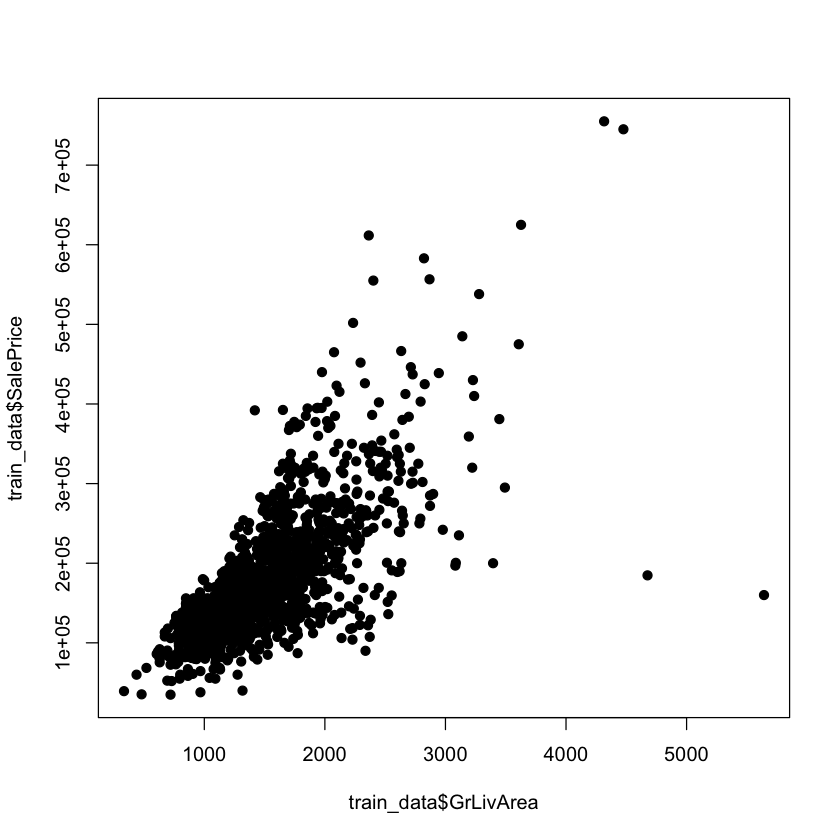

In [19]:
plot(train_data$GrLivArea, train_data$SalePrice, pch = 19, col = "Black")

So according to above scatter plot, there are few houses with ground area above 4000 sqft which can be considered as outliers in our data 

In [20]:
training <- train_data 

In [21]:
training <- training %>% 
            filter(GrLivArea < 4000)

We split the data set into 2 parts: training data (90%) and testing data (20%). We use GrLivArea as predictor, since that this variable is good explanatory variable for the variable target Sale Price.

In [22]:
inTrain <- createDataPartition(y = training$SalePrice, 
                               p = 0.90, 
                               list = FALSE)



train <- training[inTrain, ]

test <- training[-inTrain, ]

In [23]:
dim(train)
dim(test)

[1] 1312   81

[1] 144  81

In [24]:
#implementing the linear regression model 
#using GrLivArea as the predictor as the it is good explanatory variable for the variable target Sale Price.
model <- lm(SalePrice ~ GrLivArea, data = train)

In [25]:
kable(summary(model)$coef, digits=4)



|            |   Estimate| Std. Error| t value| Pr(>&#124;t&#124;)|
|:-----------|----------:|----------:|-------:|------------------:|
|(Intercept) | 12951.5634|  4690.6565|  2.7611|             0.0058|
|GrLivArea   |   111.0402|     2.9587| 37.5301|             0.0000|

In [26]:
testing <- test_data 

The terms of the model are significant. To evaluate the model according to the root-mean-squared-error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price in the testing data.

In [27]:
pred.test <- predict(model, test)
rmse <- sqrt( sum( (log(pred.test) - log(test$SalePrice))^2 , na.rm = TRUE ) / length(pred.test) )

In [28]:
rmse

[1] 0.2599034

In [29]:
pred.testing <- predict(model, testing)
submission <- data.frame(Id=testing$Id, SalePrice=pred.testing)
write.csv(submission, file="submission001.csv", row.names = FALSE, quote=FALSE)

In [30]:
df <- read.csv("submission001.csv")

In [31]:
library(ggplot2)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



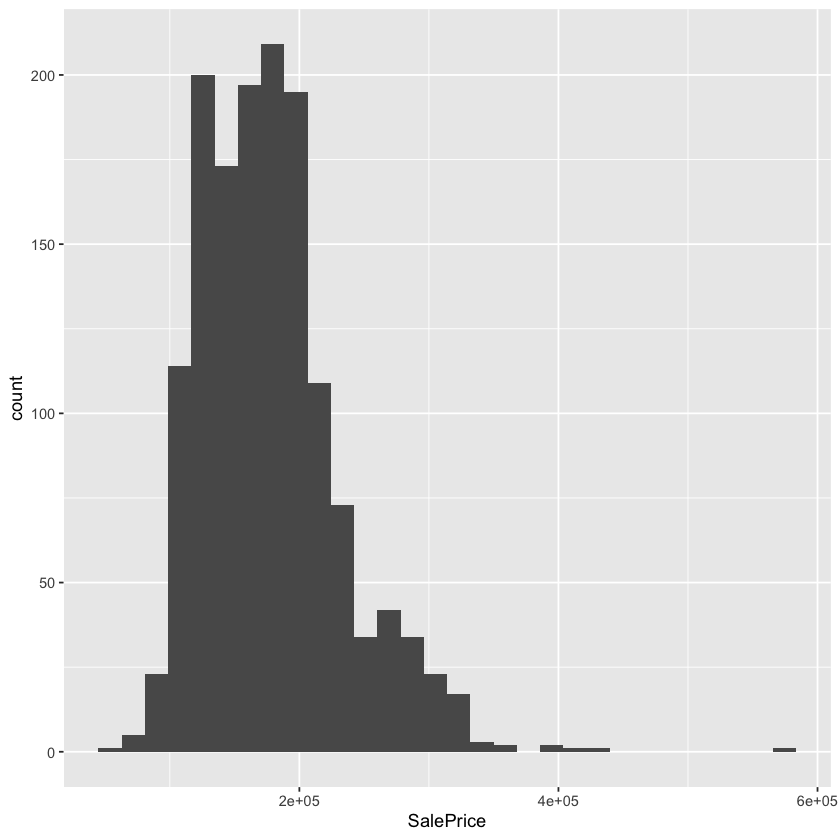

In [32]:
ggplot(df, aes(x = SalePrice)) +
geom_histogram()

In [33]:
#Linear regression against bedroomAboveGr
bedroom.model <- lm(SalePrice ~ BedroomAbvGr, data = train)
kable(summary(bedroom.model)$coef, digits=4)



|             |  Estimate| Std. Error| t value| Pr(>&#124;t&#124;)|
|:------------|---------:|----------:|-------:|------------------:|
|(Intercept)  | 139764.87|   7566.426| 18.4717|                  0|
|BedroomAbvGr |  14104.33|   2537.881|  5.5575|                  0|

In [34]:
bedroom.pred.test <- predict(bedroom.model, test)
rmse <- sqrt( sum( (log(bedroom.pred.test) - log(test$SalePrice))^2 , na.rm = TRUE ) / length(bedroom.pred.test) )
rmse

[1] 0.3752303

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



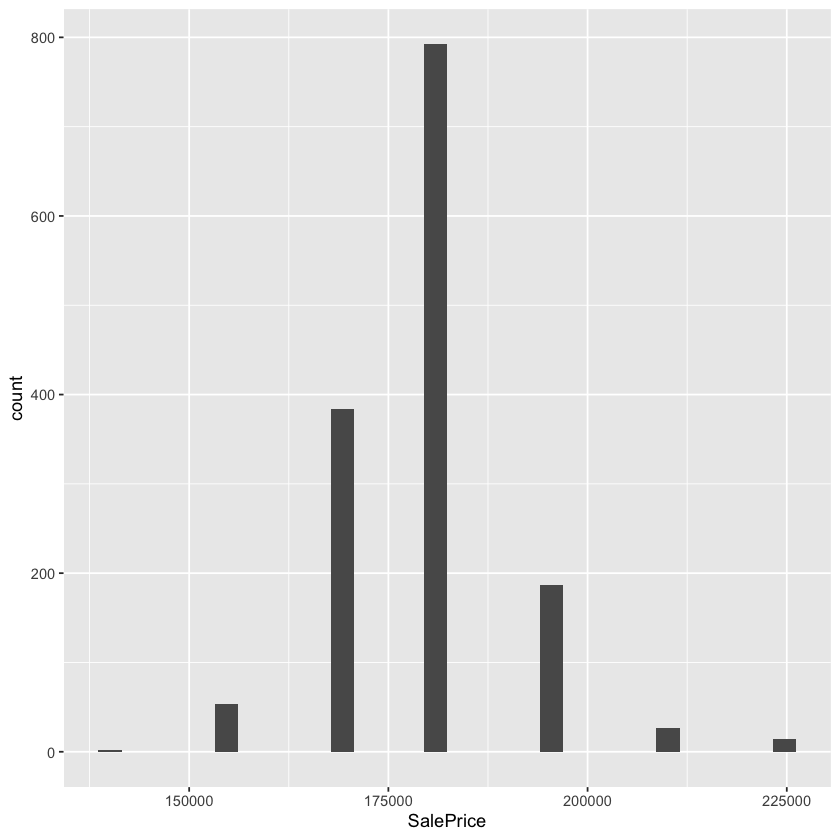

In [35]:
bedroom.pred.testing <- predict(bedroom.model, testing)
bedroom_df <- data.frame(Id=testing$Id, SalePrice=bedroom.pred.testing)
ggplot(bedroom_df, aes(x = SalePrice)) +
geom_histogram()



|            |     Estimate|  Std. Error|  t value| Pr(>&#124;t&#124;)|
|:-----------|------------:|-----------:|--------:|------------------:|
|(Intercept) | -2479891.234| 116265.6774| -21.3295|                  0|
|YearBuilt   |     1349.453|     58.9745|  22.8820|                  0|

[1] 0.3161617

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



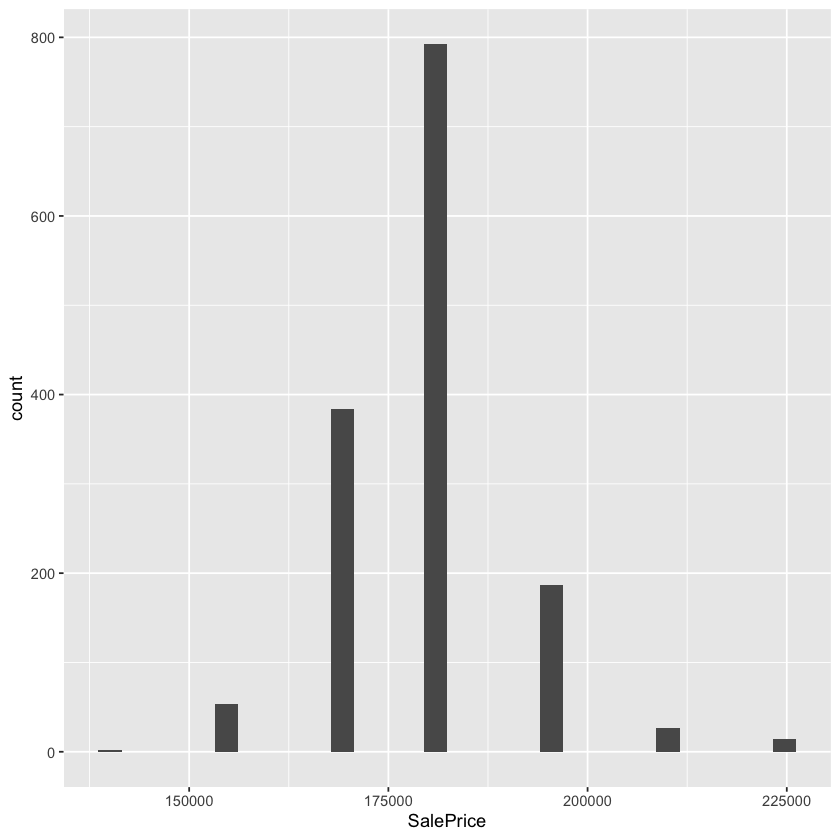

In [36]:
#Linear Regression against YearBuilt
year.model <- lm(SalePrice ~ YearBuilt, data = train)
kable(summary(year.model)$coef, digits=4)
year.pred.test <- predict(year.model, test)
rmse <- sqrt( sum( (log(year.pred.test) - log(test$SalePrice))^2 , na.rm = TRUE ) / length(year.pred.test) )
rmse
year.pred.testing <- predict(year.model, testing)
year_df <- data.frame(Id=testing$Id, SalePrice=year.pred.testing)
ggplot(bedroom_df, aes(x = SalePrice)) +
geom_histogram()



|            |   Estimate| Std. Error| t value| Pr(>&#124;t&#124;)|
|:-----------|----------:|----------:|-------:|------------------:|
|(Intercept) | 54608.6703|  4390.7588| 12.4372|                  0|
|TotalBsmtSF |   119.4333|     3.8856| 30.7375|                  0|

[1] 0.3126996

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”


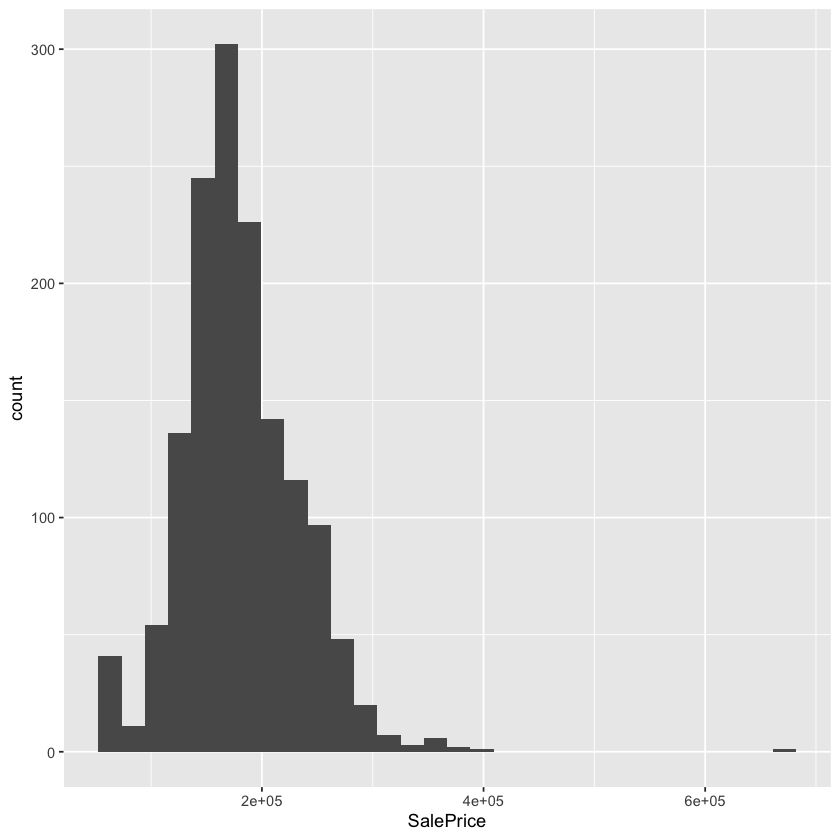

In [37]:
#Linear Regression against total basement square feet
sqft.model = lm(SalePrice ~ TotalBsmtSF, data = train)
kable(summary(sqft.model)$coef, digits = 4)
sqft.pred.test <- predict(sqft.model, test)
rmse <- sqrt( sum( (log(sqft.pred.test) - log(test$SalePrice))^2 , na.rm = TRUE ) / length(sqft.pred.test) )
rmse
sqft.pred.testing <- predict(sqft.model, testing)
sqft_df <- data.frame(Id=testing$Id, SalePrice=sqft.pred.testing)
ggplot(sqft_df, aes(x = SalePrice)) +
geom_histogram()

In [38]:
#Linear Regression against all the numeric varibables
all.model <- lm(SalePrice ~ Id + MSSubClass + LotFrontage + LotArea + OverallQual + OverallCond + OverallCond + YearRemodAdd + MasVnrArea + BsmtFinSF1 + BsmtFinSF2 + BsmtUnfSF + TotalBsmtSF + X1stFlrSF + X2ndFlrSF + LowQualFinSF + GrLivArea + BsmtFullBath + BsmtHalfBath + FullBath + HalfBath + BedroomAbvGr + KitchenAbvGr + TotRmsAbvGrd + Fireplaces + GarageYrBlt + GarageCars + GarageArea + WoodDeckSF + OpenPorchSF + EnclosedPorch + X3SsnPorch + ScreenPorch + PoolArea + MiscVal + MoSold + YrSold, data = train)

In [39]:
kable(summary(all.model)$coef, digits = 4)



|              |     Estimate|   Std. Error| t value| Pr(>&#124;t&#124;)|
|:-------------|------------:|------------:|-------:|------------------:|
|(Intercept)   | -924819.9475| 1432503.3384| -0.6456|             0.5187|
|Id            |       0.4417|       2.2207|  0.1989|             0.8424|
|MSSubClass    |    -101.3179|      29.0123| -3.4922|             0.0005|
|LotFrontage   |      49.8434|      51.3447|  0.9708|             0.3319|
|LotArea       |       0.8271|       0.1268|  6.5240|             0.0000|
|OverallQual   |   16264.4433|    1220.5737| 13.3252|             0.0000|
|OverallCond   |    3505.3585|    1054.0311|  3.3257|             0.0009|
|YearRemodAdd  |     278.3759|      70.6033|  3.9428|             0.0001|
|MasVnrArea    |      28.2705|       5.8775|  4.8099|             0.0000|
|BsmtFinSF1    |      46.8705|       5.0926|  9.2037|             0.0000|
|BsmtFinSF2    |      22.3195|       7.5665|  2.9498|             0.0033|
|BsmtUnfSF     |      22.4597|      

Warning message in predict.lm(all.model, test):
“prediction from a rank-deficient fit may be misleading”


[1] 0.1440793

Warning message in predict.lm(all.model, testing):
“prediction from a rank-deficient fit may be misleading”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 313 rows containing non-finite values (stat_bin).”
Warning message in mean.default(all.model):
“argument is not numeric or logical: returning NA”


Avg price of the house NA

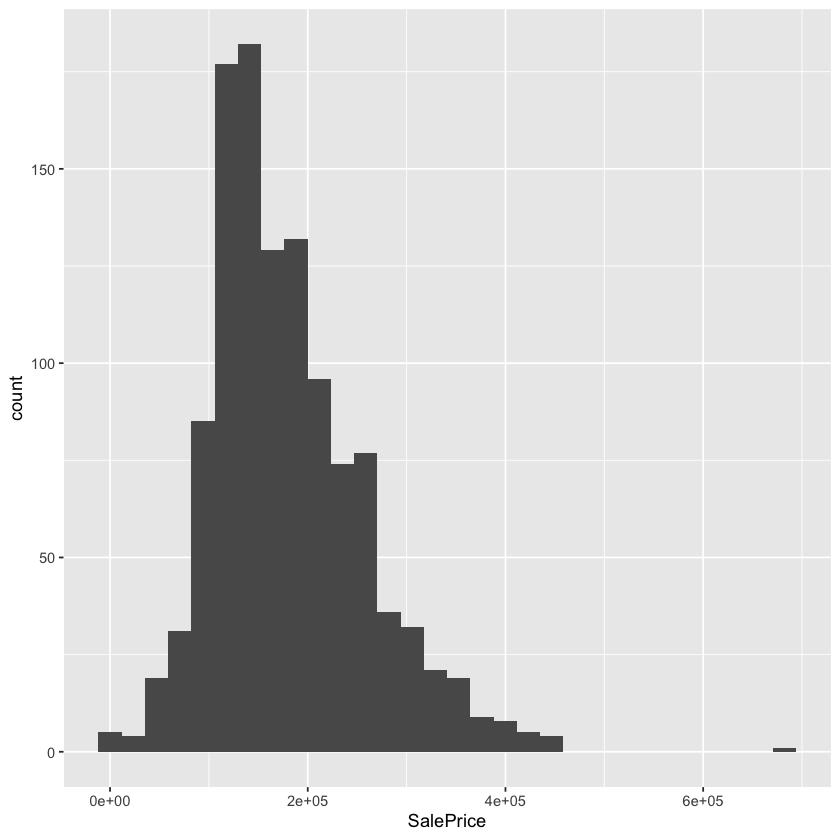

In [40]:
all.pred.test <- predict(all.model, test)
rmse <- sqrt( sum( (log(all.pred.test) - log(test$SalePrice))^2 , na.rm = TRUE ) / length(all.pred.test) )
rmse
all.pred.testing <- predict(all.model, testing)
all_df <- data.frame(Id=testing$Id, SalePrice=all.pred.testing)
ggplot(all_df, aes(x = SalePrice)) +
geom_histogram()
cat("Avg price of the house", mean(all.model))